In [1]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error

random_state=0

In [2]:
df= pd.read_csv('auto-mpg.csv')

df = df.drop('carname', axis=1)
df.columns

Index(['mpg', 'cylinders', 'displacement', 'hp', 'weight', 'acc', 'year'], dtype='object')

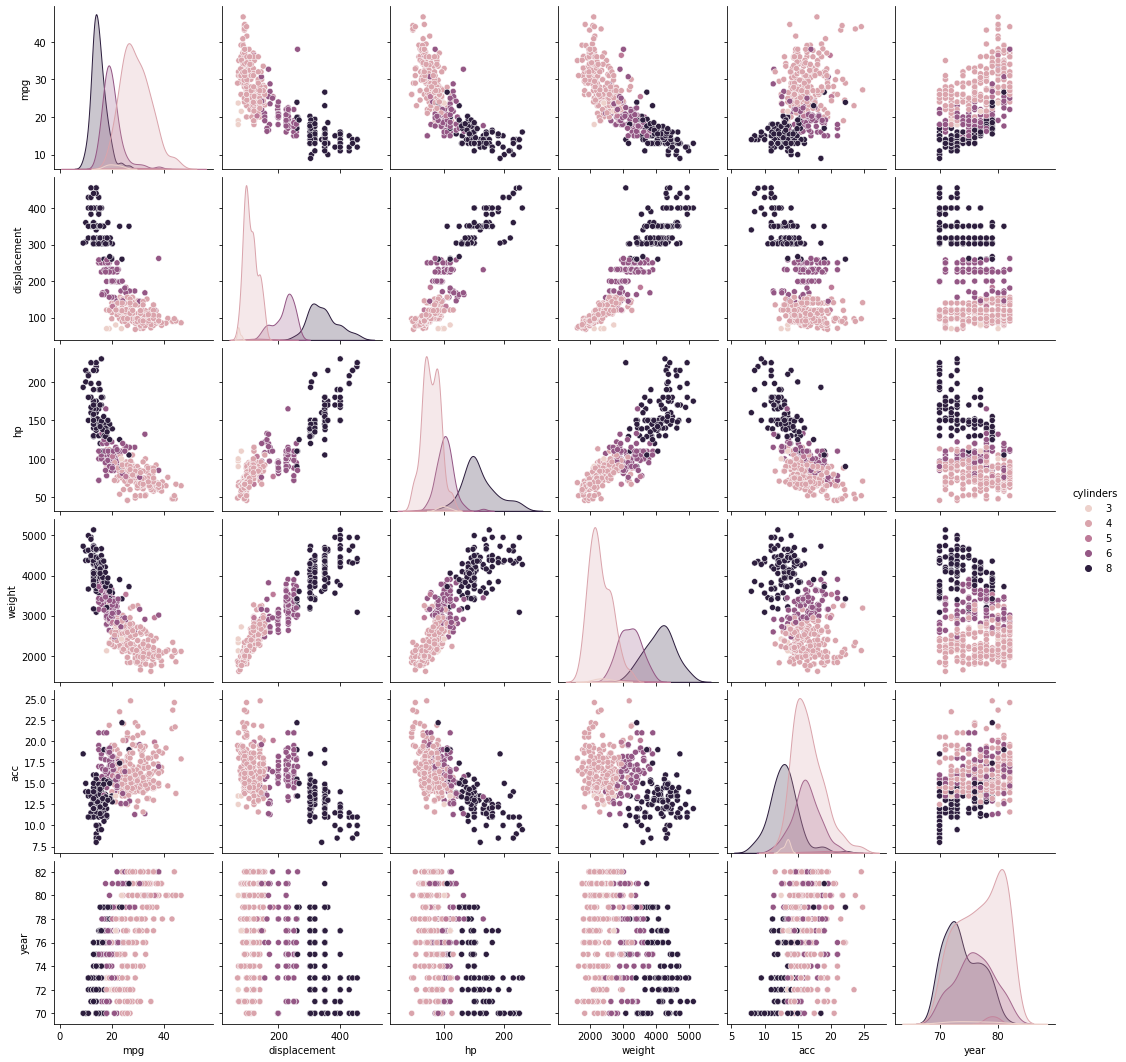

In [3]:
pp=sns.pairplot(df, hue="cylinders")
pp.savefig("autopairplot.pdf")
# Save the plot as a PDF
plt.savefig('autopairplot.pdf', format='pdf')

plt.show()

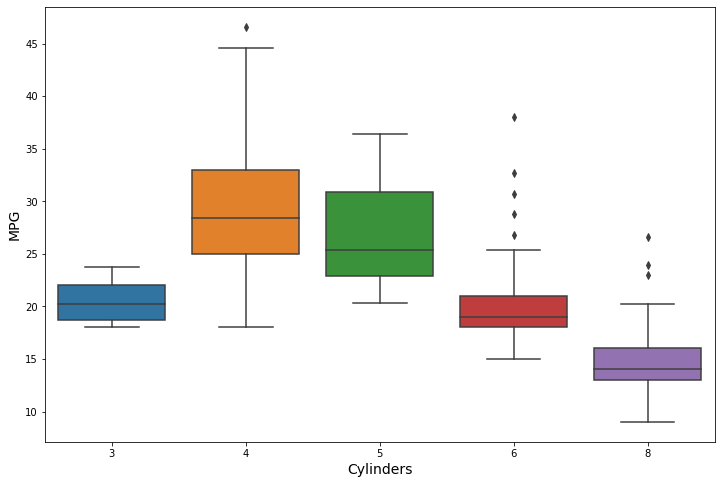

In [4]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Box plot for mpg by cylinders
sns.boxplot(x="cylinders", y="mpg", data=df)

# Set title and labels
plt.xlabel("Cylinders", fontsize=14)
plt.ylabel("MPG", fontsize=14)

# Save the plot as a PDF
plt.savefig("mpg_by_cylinders.pdf", bbox_inches="tight")

# Show the plot
plt.show()

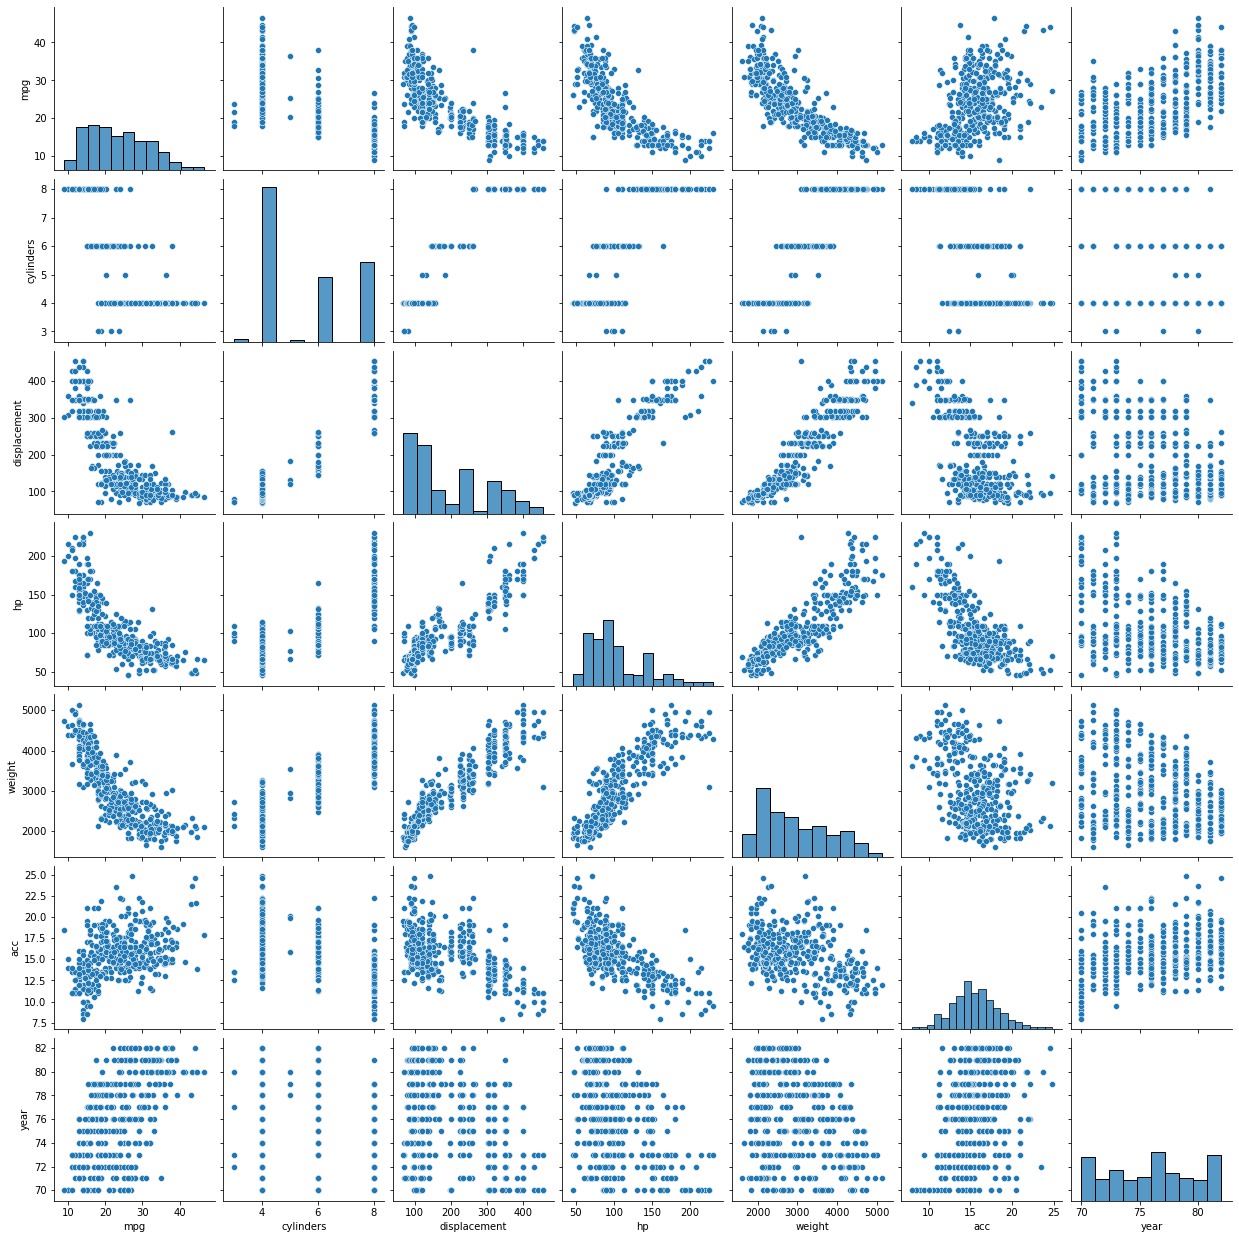

In [5]:
sns.pairplot(df)
# Save the plot as a PDF
plt.savefig("autopairplotdf.pdf", bbox_inches="tight")
plt.show()

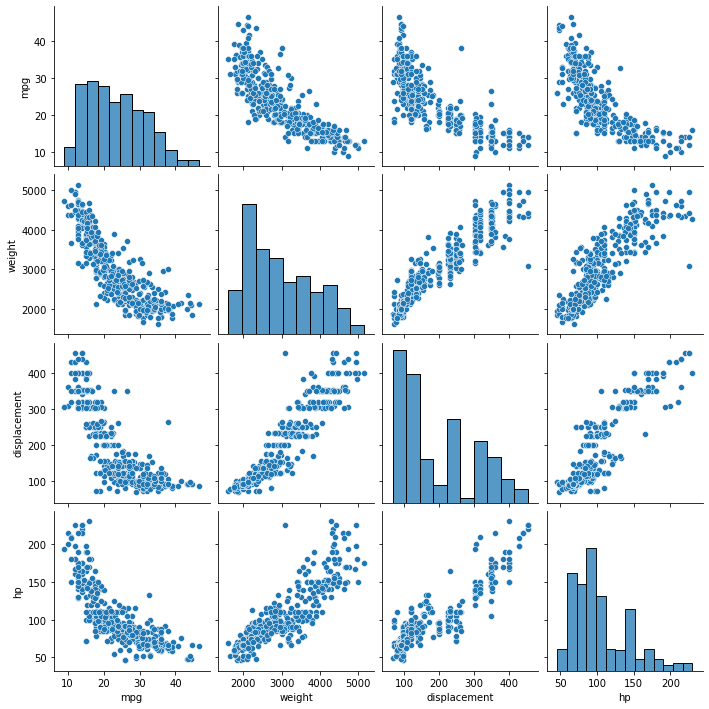

In [6]:
sns.pairplot(df[['mpg', 'weight', 'displacement', 'hp']])
# Save the plot as a PDF
plt.savefig("autopairplot.pdf", bbox_inches="tight")
plt.show()


                   mpg  cylinders  displacement        hp    weight       acc  \
mpg           1.000000  -0.777618     -0.805127 -0.778427 -0.832244  0.423329   
cylinders    -0.777618   1.000000      0.950823  0.842983  0.897527 -0.504683   
displacement -0.805127   0.950823      1.000000  0.897257  0.932994 -0.543800   
hp           -0.778427   0.842983      0.897257  1.000000  0.864538 -0.689196   
weight       -0.832244   0.897527      0.932994  0.864538  1.000000 -0.416839   
acc           0.423329  -0.504683     -0.543800 -0.689196 -0.416839  1.000000   
year          0.580541  -0.345647     -0.369855 -0.416361 -0.309120  0.290316   

                  year  
mpg           0.580541  
cylinders    -0.345647  
displacement -0.369855  
hp           -0.416361  
weight       -0.309120  
acc           0.290316  
year          1.000000  


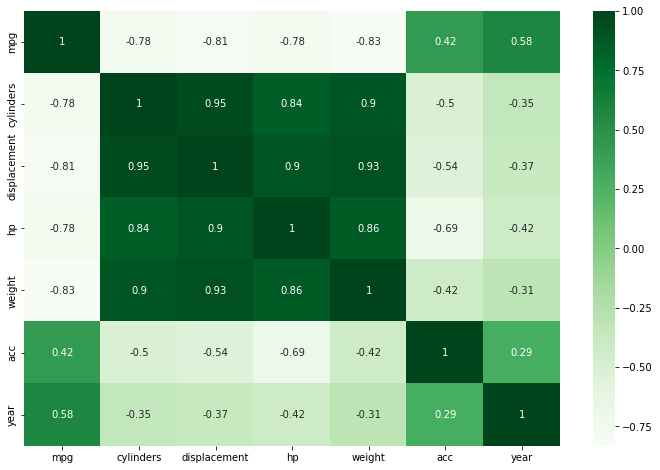

In [7]:
# Compute the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Greens")
plt.savefig("heatmapauto.pdf", bbox_inches="tight")
plt.show()


<Figure size 864x576 with 0 Axes>

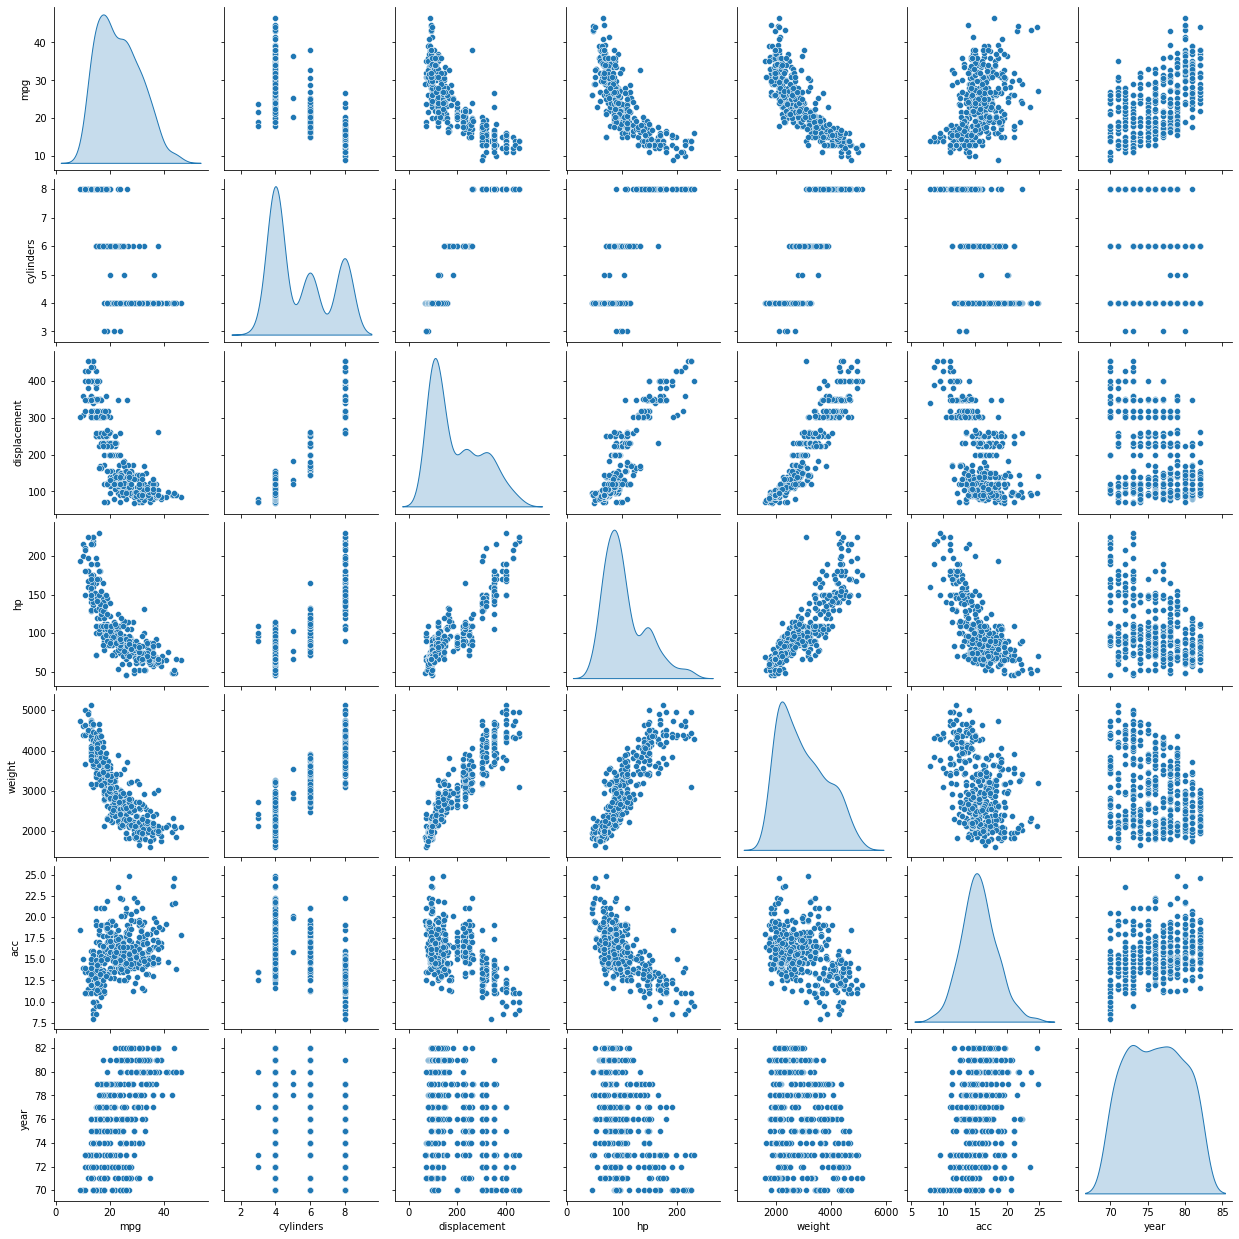

In [8]:
# Pair plot
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Pair plot with a custom color
sns.pairplot(df, diag_kind="kde")
plt.savefig("pairplotauto.pdf", bbox_inches="tight")
plt.show()

In [9]:
df.head()

,mpg,cylinders,displacement,hp,weight,acc,year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [10]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X
# Perform RFE with cross-validation
rfe_cv = RFECV(RandomForestRegressor(n_estimators=100, random_state=0), scoring='neg_mean_absolute_error', cv=10)
rfe_cv.fit(X, y)

# Get the optimal number of features
optimal_n = rfe_cv.n_features_
print('Optimal number of features:', optimal_n)

# Get the mask of selected features
selected_features_mask = rfe_cv.support_

# Print the selected feature names
selected_feature_names = np.array(X.columns)[selected_features_mask]
print("Selected features:", selected_feature_names)

# Create a new DataFrame with the selected features
X_selected = X.iloc[:, selected_features_mask]

X= X_selected


Optimal number of features: 6
Selected features: ['cylinders' 'displacement' 'hp' 'weight' 'acc' 'year']


In [11]:
X

,cylinders,displacement,hp,weight,acc,year
0,8,307.0,130,3504,12.0,70
1,8,350.0,165,3693,11.5,70
2,8,318.0,150,3436,11.0,70
3,8,304.0,150,3433,12.0,70
4,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,82
388,4,97.0,52,2130,24.6,82
389,4,135.0,84,2295,11.6,82
390,4,120.0,79,2625,18.6,82


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Random Forest
start_time_rf = time.time()
ranf = RandomForestRegressor(random_state=0)
rf = ranf.fit(X_train, y_train)
scores_rf = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_rf = cross_val_predict(ranf, X_test, y_test)
scores_test_rf = cross_val_score(ranf, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_rf = time.time() - start_time_rf
print("Runtime for Random Forest:", runtime_rf)
#print("Mean Absolute Error (Train):", np.mean(scores_dt) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_rf) * -1)
print()


# Decision Tree
start_time_dt = time.time()
dectree = DecisionTreeRegressor(random_state=0)
dt = dectree.fit(X_train, y_train)
scores_dt = cross_val_score(dt, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_dt = cross_val_predict(dectree, X_test, y_test)
scores_test_dt = cross_val_score(dectree, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_dt = time.time() - start_time_dt
print("Runtime for Decision Tree:", runtime_dt)
#print("Results for Decision Tree:")
#print("Mean Absolute Error (Train):", np.mean(scores_dt) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_dt) * -1)
print()

# K-Nearest Neighbors
start_time_knn = time.time()
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn_model, X_test, y_test)
scores_test_knn = cross_val_score(knn_model, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_knn = time.time() - start_time_knn
print("Runtime for K-Nearest Neighbors:", runtime_knn)
#print("Mean Absolute Error (Train):", np.mean(scores_knn) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_knn) * -1)
print()


# XGBoost
start_time_xgb = time.time()
xgb_reg = xgb.XGBRegressor(random_state=0)
scores_xgb = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_xgb = cross_val_predict(xgb_reg, X_test, y_test)
scores_test_xgb = cross_val_score(xgb_reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_xgb = time.time() - start_time_xgb
print("Runtime for XGBoost:", runtime_xgb)
#print("Mean Absolute Error (Train):", np.mean(scores_xgb) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_xgb) * -1)
print()

Runtime for Random Forest: 2.0539896488189697
Mean Absolute Error (Test): 2.04769107142857

Runtime for Decision Tree: 0.04610276222229004
Mean Absolute Error (Test): 2.684107142857143

Runtime for K-Nearest Neighbors: 0.02452254295349121
Mean Absolute Error (Test): 3.2712142857142856

Runtime for XGBoost: 333.9360795021057
Mean Absolute Error (Test): 2.141738089833941



In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state=0)

# Random Forest
ranf = RandomForestRegressor(random_state=0)
rf = ranf.fit(X_train, y_train)
scores_rf = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_rf = cross_val_predict(ranf, X_test, y_test)
scores_test_rf = cross_val_score(ranf, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_rf) * -1)

# Decision Tree
dectree = DecisionTreeRegressor(random_state=0)
dt = dectree.fit(X_train, y_train)
scores_dt = cross_val_score(dt, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_dt = cross_val_predict(dectree, X_test, y_test)
scores_test_dt = cross_val_score(dectree, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_dt) * -1)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn_model, X_test, y_test)
scores_test_knn = cross_val_score(knn_model, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_knn) * -1)

# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=0)
scores_xgb = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_xgb = cross_val_predict(xgb_reg, X_test, y_test)
scores_test_xgb = cross_val_score(xgb_reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_xgb) * -1)

2.04769107142857
2.684107142857143
3.2712142857142856
2.141738089833941


In [14]:
X1=X

     cylinders  displacement        hp    weight       acc      year
0          1.6      0.793282  0.706522  0.993479  0.714286  5.833333
1          1.6      0.904393  0.896739  1.047065  0.684524  5.833333
2          1.6      0.821705  0.815217  0.974199  0.654762  5.833333
3          1.6      0.785530  0.815217  0.973348  0.714286  5.833333
4          1.6      0.780362  0.760870  0.977885  0.625000  5.833333
..         ...           ...       ...       ...       ...       ...
387        0.8      0.361757  0.467391  0.791041  0.928571  6.833333
388        0.8      0.250646  0.282609  0.603913  1.464286  6.833333
389        0.8      0.348837  0.456522  0.650695  0.690476  6.833333
390        0.8      0.310078  0.429348  0.744259  1.107143  6.833333
391        0.8      0.307494  0.445652  0.771194  1.154762  6.833333

[392 rows x 6 columns]


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-15-6b3901ce781d>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-15-6b3901ce781d>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val

Runtime: 4150.111839771271


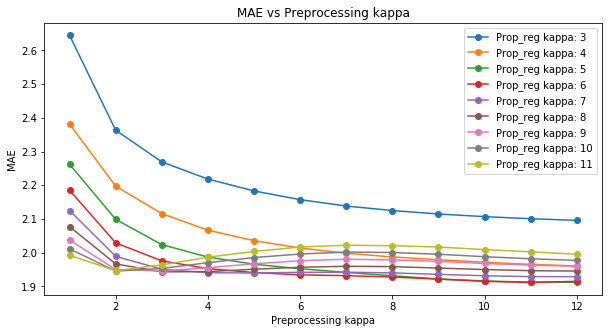

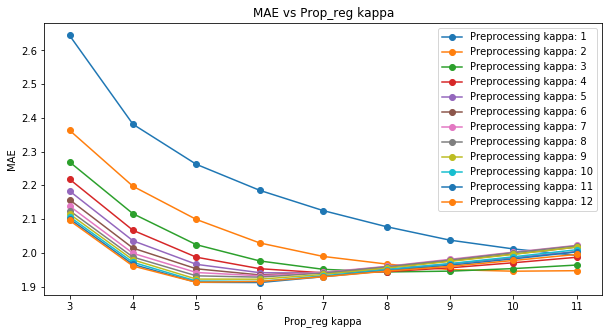

Optimal Preprocessing kappa: 11
Optimal Prop_reg kappa: 6
Minimum MAE: 1.911769753886918


In [15]:
start_time = time.time()
def normalize(X1):
    result = X1.copy()
    for feature_name in X1.columns:
        max_value = X1[feature_name].max()
        min_value = X1[feature_name].min()
        result[feature_name] = X1[feature_name] / (max_value - min_value)
    return result

X = normalize(X1)
print(X)
def preprocess_data(X_train, X_test, y_train, kappa, ordinal_columns):
    X_train, X_test = handle_categorical(X_train, X_test, y_train, ordinal_columns)
    X_train, X_test = handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns)
    return X_train, X_test


def handle_categorical(X_train, X_test, y_train, ordinal_columns):
    means = {}

    for col in X_train.columns:
        if col not in ordinal_columns:  # Categorical variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_train:
                mean = y_train[X_train[col] == val].mean()
                means[(col, val)] = mean
                print(f"Column: {col}, Value: {val}, Mean: {mean}")

            for val in unique_values_test:
                if val not in unique_values_train:
                    print(f"Warning: Value {val} in column {col} of X_test is not in X_train.")

    for col, val in means:
        X_train.loc[X_train[col] == val, col] = means[(col, val)]
        X_test.loc[X_test[col] == val, col] = means[(col, val)]

    return X_train, X_test


def handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns):
    missing_values = {}

    for col in X_train.columns:
        if col in ordinal_columns:  # Ordinal variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_test:
                y_train_np = y_train.to_numpy()
                X_train_col_np = X_train[[col]].to_numpy()
                X_test_col_val = val
                l = 0
                v = 0
                for j in range(X_train_col_np.shape[0]):
                    d=np.sqrt(np.sum((X_test_col_val - X_train_col_np[j])**2))
                    l += y_train_np[j] / ((1 + d) ** kappa)
                    v += 1 / ((1 + d) ** kappa)
                imputed_value = l / v
                missing_values[(col, val)] = imputed_value

            for val in unique_values_train:
                if val not in unique_values_test:
                    y_train_np = y_train.to_numpy()
                    X_train_col_np = X_train[[col]].to_numpy()
                    X_train_col_val = val
                    l = 0
                    v = 0
                    for j in range(X_train_col_np.shape[0]):
                        d = abs(X_train_col_val - X_train_col_np[j])
                        l += y_train_np[j] / ((1 + d) ** kappa)
                        v += 1 / ((1 + d) ** kappa)
                    imputed_value = l / v
                    missing_values[(col, val)] = imputed_value

    for col, val in missing_values:
        X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
        X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

    return X_train, X_test



def prop_reg(X_test,X_train,y_train,y_test,kappa):
    d = np.zeros((len(X_test),len(X_train)))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            d[i,j] = np.linalg.norm(X_test[i]-X_train[j])
    c=np.zeros(len(y_test))
    for i in range(len(y_test)):
        l=0
        v=0
        for j in range(len(y_train)):
            
            l+=y_train[j]/((1+d[i,j])**kappa)
            v+=1/((1+d[i,j])**kappa)
        
        c[i]=l/v
    return(c)


def kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    results = {}
    mae_values_per_kappa = {}

    for kappa_preprocessing in kappa_values_preprocessing:
        for kappa_prop_reg in kappa_values_prop_reg:
            mae_values = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                X_train_preprocessed, X_test_preprocessed = preprocess_data(X_train, X_test, y_train, kappa_preprocessing, ordinal_columns)
                y_pred = prop_reg(X_test_preprocessed.values, X_train_preprocessed.values, y_train.values, y_test.values, kappa_prop_reg)
                mae = mean_absolute_error(y_test, y_pred)
                mae_values.append(mae)

            results[(kappa_preprocessing, kappa_prop_reg)] = np.mean(mae_values)
            mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)] = mae_values

    return results, mae_values_per_kappa



ordinal_columns = ['cylinders', 'displacement', 'hp', 'weight', 'acc', 'year']
kappa_values_preprocessing = [1,2,3,4,5,6,7,8,9,10,11,12]
kappa_values_prop_reg = [3,4,5,6,7,8,9,10,11]

cv_results, mae_values_per_kappa = kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg)

runtime_pr = time.time() - start_time
print("Runtime:", runtime_pr)

# Plot the MAE vs kappa curve for preprocessing
plt.figure(figsize=(10, 5))
for kappa_prop_reg in kappa_values_prop_reg:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_preprocessing in kappa_values_preprocessing]
    plt.plot(kappa_values_preprocessing, mae_values, '-o', label=f"Prop_reg kappa: {kappa_prop_reg}")

plt.xlabel('Preprocessing kappa')
plt.ylabel('MAE')
plt.title('MAE vs Preprocessing kappa')
plt.legend()
plt.show()

# Plot the MAE vs kappa curve for prop_reg
plt.figure(figsize=(10, 5))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o', label=f"Preprocessing kappa: {kappa_preprocessing}")

plt.xlabel('Prop_reg kappa')
plt.ylabel('MAE')
plt.title('MAE vs Prop_reg kappa')
plt.legend()
plt.show()


    # Find the optimal combination of kappa values
optimal_kappa_preprocessing, optimal_kappa_prop_reg = min(cv_results, key=cv_results.get)
optimal_mae = cv_results[(optimal_kappa_preprocessing, optimal_kappa_prop_reg)]

print(f"Optimal Preprocessing kappa: {optimal_kappa_preprocessing}")
print(f"Optimal Prop_reg kappa: {optimal_kappa_prop_reg}")
print(f"Minimum MAE: {optimal_mae}")


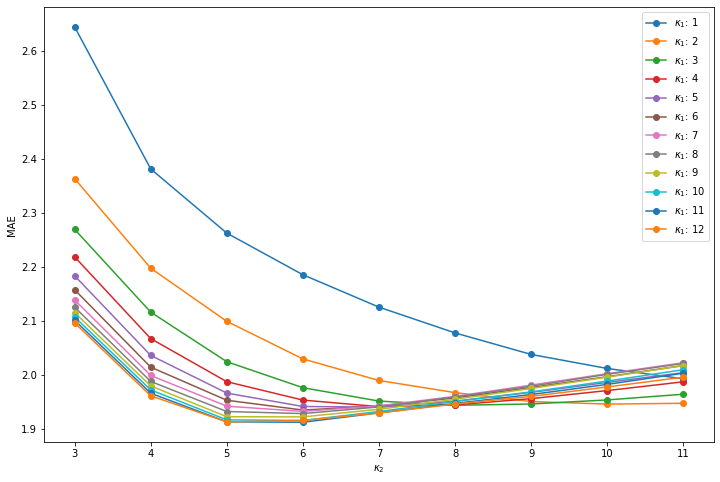

In [16]:
plt.figure(figsize=(12, 8))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o', label=f"$\\kappa_1$: {kappa_preprocessing}")

plt.xlabel('$\\kappa_2$')
plt.ylabel('MAE')
plt.legend()

# Save the plot as a PDF
plt.savefig('autofull_mae_vs_predicting_kappa.pdf', format='pdf')

# Show the plot
plt.show()


In [17]:
# Print all the combinations of kappa values and their corresponding MAE values
print("Kappa combinations and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print((kappa_preprocessing, kappa_prop_reg, mae))

# Print all the combinations of kappa values and their corresponding MAE values
print("Prop_reg kappa and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print((kappa_prop_reg, mae))
    

Kappa combinations and their MAE values:
(1, 3, 2.6444102826178444)
(1, 4, 2.381120507481819)
(1, 5, 2.2622133614711872)
(1, 6, 2.1850897788338686)
(1, 7, 2.125049986574467)
(1, 8, 2.0772562266409533)
(1, 9, 2.037410254298585)
(1, 10, 2.011382135056368)
(1, 11, 1.9923135757775516)
(2, 3, 2.3631769639776876)
(2, 4, 2.1972063266709814)
(2, 5, 2.0987749639467106)
(2, 6, 2.029091062939269)
(2, 7, 1.9891565960387105)
(2, 8, 1.9666006581654834)
(2, 9, 1.9500714047313814)
(2, 10, 1.9453803796115796)
(2, 11, 1.9469049093143738)
(3, 3, 2.269238733070102)
(3, 4, 2.1158108711992965)
(3, 5, 2.0239319078411344)
(3, 6, 1.9757644684228512)
(3, 7, 1.9509689277435367)
(3, 8, 1.9431626770736787)
(3, 9, 1.9455829378783291)
(3, 10, 1.9531360399858833)
(3, 11, 1.963676770062225)
(4, 3, 2.2181711369914305)
(4, 4, 2.0667201832226816)
(4, 5, 1.9868814640103836)
(4, 6, 1.9527999190587462)
(4, 7, 1.9406478435023207)
(4, 8, 1.9438709341407665)
(4, 9, 1.9555207758935254)
(4, 10, 1.9704535205400826)
(4, 11, 1.9866

In [18]:
# Print all the combinations of kappa values and their corresponding MAE values
print("Kappa combinations and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print(f"Preprocessing kappa: {kappa_preprocessing}, Prop_reg kappa: {kappa_prop_reg}, MAE: {mae}")
    

Kappa combinations and their MAE values:
Preprocessing kappa: 1, Prop_reg kappa: 3, MAE: 2.6444102826178444
Preprocessing kappa: 1, Prop_reg kappa: 4, MAE: 2.381120507481819
Preprocessing kappa: 1, Prop_reg kappa: 5, MAE: 2.2622133614711872
Preprocessing kappa: 1, Prop_reg kappa: 6, MAE: 2.1850897788338686
Preprocessing kappa: 1, Prop_reg kappa: 7, MAE: 2.125049986574467
Preprocessing kappa: 1, Prop_reg kappa: 8, MAE: 2.0772562266409533
Preprocessing kappa: 1, Prop_reg kappa: 9, MAE: 2.037410254298585
Preprocessing kappa: 1, Prop_reg kappa: 10, MAE: 2.011382135056368
Preprocessing kappa: 1, Prop_reg kappa: 11, MAE: 1.9923135757775516
Preprocessing kappa: 2, Prop_reg kappa: 3, MAE: 2.3631769639776876
Preprocessing kappa: 2, Prop_reg kappa: 4, MAE: 2.1972063266709814
Preprocessing kappa: 2, Prop_reg kappa: 5, MAE: 2.0987749639467106
Preprocessing kappa: 2, Prop_reg kappa: 6, MAE: 2.029091062939269
Preprocessing kappa: 2, Prop_reg kappa: 7, MAE: 1.9891565960387105
Preprocessing kappa: 2, 

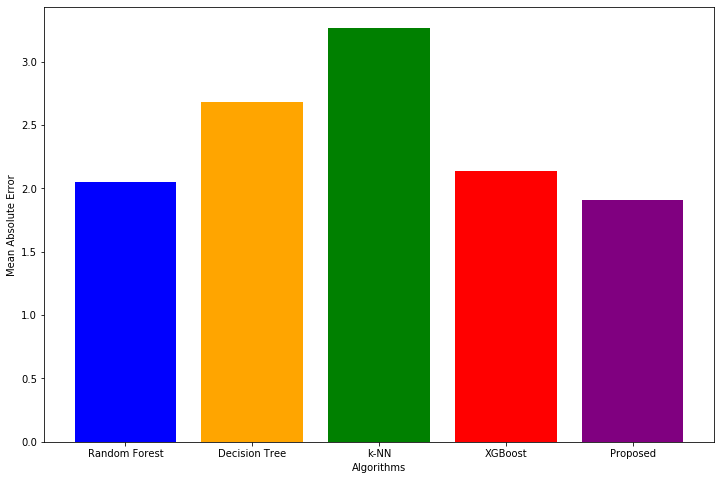

In [19]:
import matplotlib.pyplot as plt

# Results data
results = {
    'Random Forest': 2.05,
    'Decision Tree': 2.68,
    'k-NN': 3.27,
    'XGBoost': 2.14,
    'Proposed': 1.91,
}

# Plot the bar graph
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(results.keys(), results.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
ax.set_xlabel('Algorithms')
ax.set_ylabel('Mean Absolute Error')

# Save the plot as a PDF
plt.savefig('autoresults_bar_graph.pdf', format='pdf')

# Show the plot
plt.show()


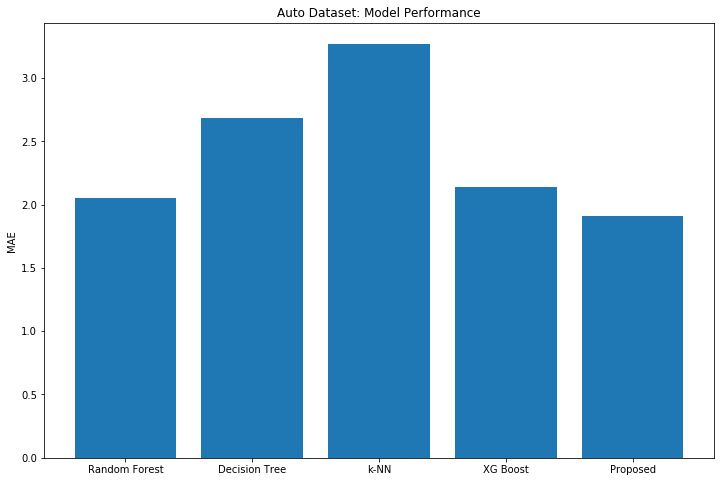

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Auto dataset results
algorithms = ['Random Forest', 'Decision Tree', 'k-NN', 'XG Boost', 'Proposed']
mae_values = [2.048, 2.684, 3.271, 2.141, 1.912]

fig, ax = plt.subplots(figsize=(12, 8))
bar_plot = ax.bar(algorithms, mae_values)
ax.set_ylabel('MAE')
ax.set_title('Auto Dataset: Model Performance')
plt.savefig('auto_dataset_bargraph.pdf')
plt.show()
